In [1]:
import os
from os import path

os.environ["DEBUG"] = "false"

In [2]:
import random

import torch
from torch.utils.data import Subset
from transformers import AutoTokenizer, TrOCRProcessor

from lib.data_aug_v2 import build_data_aug
from lib.datasets import OCRDataset, EvalDataset, list_text_files
from lib.tang_syn_config import preload_fonts, load_default_config

MAX_LENGTH = 64


def load_datasets(processor, tokenizer):
    dataset_dir = 'dataset/data'

    default_config = load_default_config()
    fonts = preload_fonts(default_config)

    train_dataset = OCRDataset(dataset_dir=dataset_dir,
                               labels_dir="dataset/labels/train",
                               tokenizer=tokenizer,
                               processor=processor,
                               mode="online",
                               transform=build_data_aug(height=64,
                                                        mode="train",
                                                        resizepad=False),
                               max_target_length=MAX_LENGTH,
                               text_files=list_text_files(),
                               default_config=default_config,
                               fonts=fonts,
                               debug=True)

    # Define the number of samples to keep in eval dataset

    eval_dataset = EvalDataset(dataset_dir=dataset_dir,
                               labels_dir="dataset/labels/test-ic13",
                               tokenizer=tokenizer,
                               processor=processor,
                               mode="eval",
                               transform=build_data_aug(height=64,
                                                        mode="eval",
                                                        resizepad=False),
                               max_target_length=MAX_LENGTH,
                               debug=True)

    # Create a random subset of the dataset
    num_samples = 100
    subset_indices = torch.randperm(len(eval_dataset))[:num_samples]
    eval_dataset = Subset(eval_dataset, subset_indices.tolist())

    print("Number of training examples:", len(train_dataset))
    print("Number of validation examples:", len(eval_dataset))

    return train_dataset, eval_dataset


model_pth = 'models/tang-syn-5.0-online-epoch-1'

tokenizer = AutoTokenizer.from_pretrained(model_pth)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
train_dataset, eval_dataset = load_datasets(processor=processor,
                                            tokenizer=tokenizer)
train_dataset.load_texts()

pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Fallback font cmaps loaded.
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame commu

25 extra bytes in post.stringData array
165399 extra bytes in post.stringData array
158369 extra bytes in post.stringData array
201846 extra bytes in post.stringData array


All font cmaps loaded: 1589


100%|██████████| 1/1 [00:00<00:00, 35.25it/s]


Number of training examples: 36000000
Number of validation examples: 100
Loading text files...


100%|██████████| 7/7 [00:00<00:00, 212.66it/s]

Text files loaded.


华存松倒来茶，把杯子放在华德贤面前说：“这茶不那么热了，你喝吧。”
洋他应当会给的。”
开华也说：“今年天气好，种什么有什么，花生、
如何是好。那个黄秋生家里虽然没发什么财，但日子过得还蛮好的，不
华德贤不高兴地说：“那不行，今天有很重要的事，乡长和县党部的干事都会
来了。妈妈很想你们，我们也天天念着你们，就趁这个时候请你们过来团聚团聚。”
类的东西。能够读完“四书”的人，是很难能
四
华优志说：“到大路边住伙铺和到量子住伙铺还不是一样的？反正第二天就能
俊龙依偎着外婆，微笑着说：“外婆，不要说了，我给你看一个东西。”他连忙


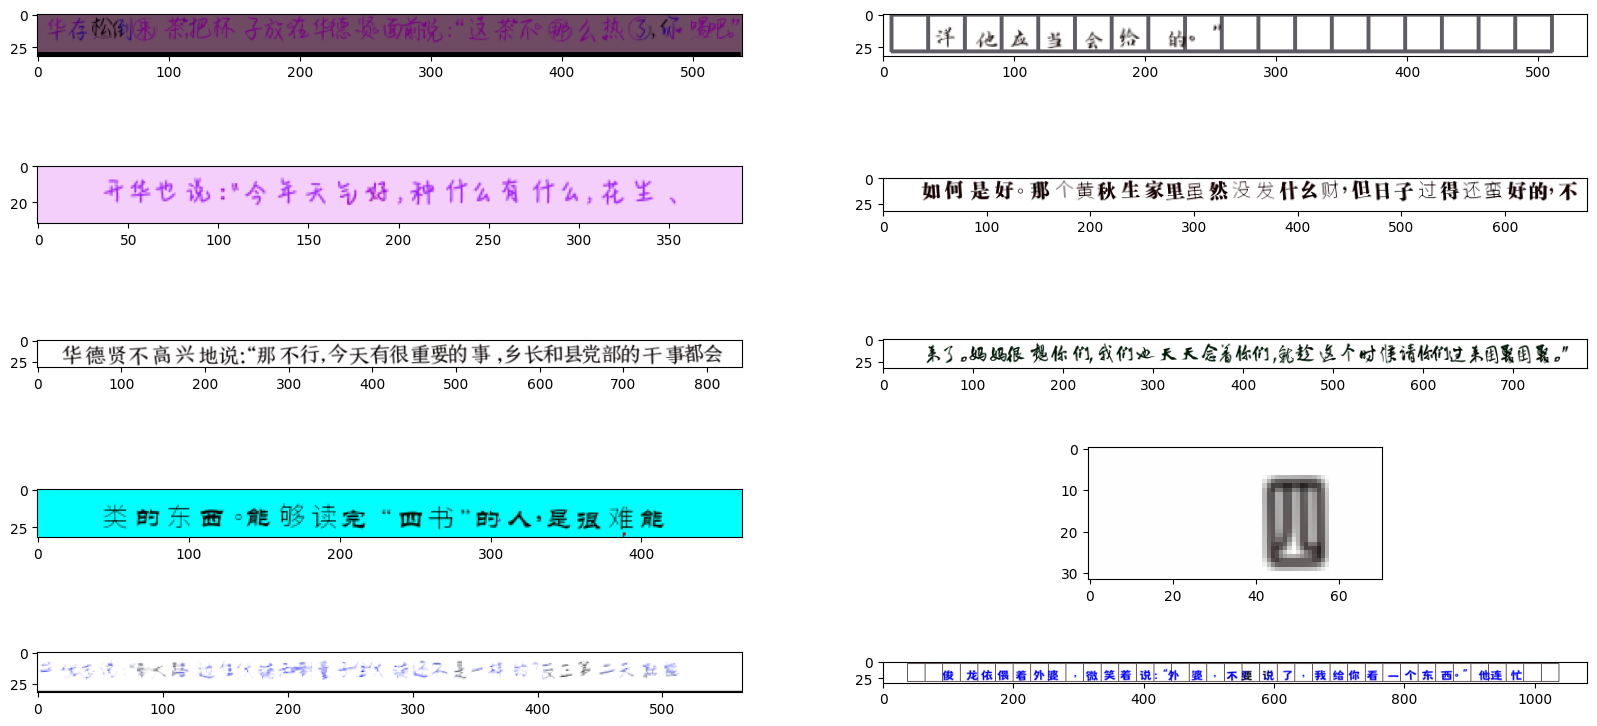

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Set the figure size

length = len(train_dataset)

for i in range(10):

    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

    plt.subplot(5, 2, i + 1)  # Create a subplot for each image
    plt.imshow(res[0])  # Display the image

    print(res[1])

plt.show()

In [14]:
torch.Tensor(tokenizer(res[1],
                       padding="max_length",
                       truncation=True,
                       max_length=64,
                       ).input_ids).dtype

torch.float32

In [13]:
tokenizer(res[1],
          padding="max_length",
          truncation=True,
          max_length=64,
          return_tensors="pt").input_ids.squeeze().dtype

torch.int64

In [17]:
processor(res[0], return_tensors="pt").pixel_values.squeeze().dtype

torch.float32

In [4]:
from tqdm import tqdm

for i in tqdm(range(1000)):
    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

100%|██████████| 1000/1000 [00:19<00:00, 51.78it/s]
